In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
nba = pd.read_csv("nba.csv")

In [25]:
#a=nba.groupby(["Position","Team"]).mean()
#b = a[["Age","Salary"]]
#print(b)

In [26]:
p_table = nba.pivot_table(["Age","Salary"],index=["Position","Team"])
p_table

Age        Salary
Position Team                                       
C        Atlanta Hawks       28.333333  7.585417e+06
         Boston Celtics      25.000000  2.450465e+06
         Brooklyn Nets       27.000000  1.031814e+07
         Charlotte Hornets   25.666667  6.772240e+06
         Chicago Bulls       33.000000  1.042438e+07
...                                ...           ...
SG       Sacramento Kings    26.250000  2.794976e+06
         San Antonio Spurs   31.250000  3.384923e+06
         Toronto Raptors     24.500000  5.350000e+06
         Utah Jazz           23.500000  5.405962e+06
         Washington Wizards  27.250000  2.839248e+06

[149 rows x 2 columns]

([<matplotlib.axis.XTick at 0x16104a75f48>,
 <a list of 5 Text xticklabel objects>)

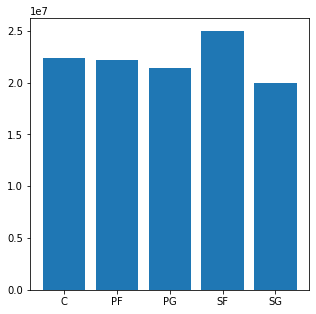

In [33]:
plt.figure(figsize=(5,5))
max_Salary = lambda g: g.Salary.max()
b = nba.groupby("Position")
max_Salary(b)
#nba.groupby("Position").apply(max_Salary)
h = np.arange(len(b))
plt.bar(h,max_Salary(b).values)
plt.xticks(h,sorted(nba.Position.drop_duplicates().dropna().values))
#plt.xticks(h,['C','PF','PG','SF','SG'])

In [34]:
y1 = nba.Team.drop_duplicates().dropna()
y2 = y1.str.split().str[1]
team_name=y1.str[0]+y2.str[0]
team_name

0      BC
15     BN
30     NY
46     P7
61     TR
76     GS
91     LA
106    LA
121    PS
136    SK
151    CB
166    CC
181    DP
196    IP
211    MB
227    DM
242    HR
257    MG
275    NO
294    SA
309    AH
324    CH
339    MH
354    OM
368    WW
383    DN
398    MT
412    OC
427    PT
442    UJ
Name: Team, dtype: object

In [35]:
team_max_age=nba.groupby("Team").Age.max()
team_max_Salary = nba.groupby("Team").Salary.max()

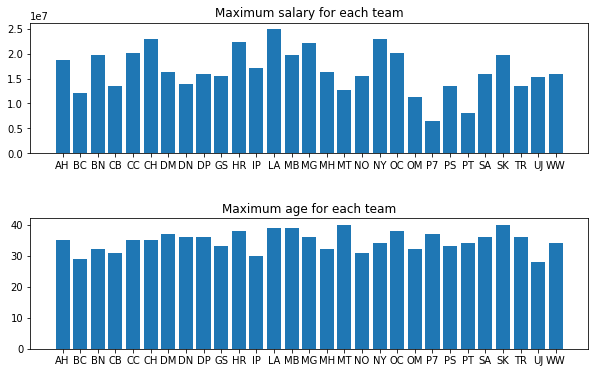

In [36]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,1,1)
ax1.bar(sorted(team_name.tolist()),team_max_Salary)
plt.title("Maximum salary for each team")

ax2 = fig.add_subplot(2,1,2)
ax2.bar(sorted(team_name.tolist()),team_max_age)
plt.title("Maximum age for each team")
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)